Name: Ayse Irmak Ercevik

ID: 181104003

Course: BIL570 /BIL470

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dt import DecisionTreeClassifier

# Exploratory Data Analysis (EDA)

### Read Dataset

In [5]:
iris = pd.read_csv("Iris.csv");

Improve dataset:
Remove id column 
Change Class labels that are given in the last column to  integer values (0, 1, 2);


In [6]:
iris = iris.drop(columns="Id");
spc = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2} 
iris["Species"] = [spc[item] for item in iris["Species"]];


### Dataset Summary

General image of dataset

In [7]:
display(iris);

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Summary of each Features data

In [11]:
sl=iris["SepalLengthCm"].describe();
sw=iris["SepalWidthCm"].describe();
pl=iris["PetalLengthCm"].describe();
pw=iris["PetalWidthCm"].describe();
print(sl);
print(sw);
print(pl);
print(pw);

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


Duplicat data in the dataset

In [61]:
display(iris[iris.duplicated()])
display(iris.duplicated().sum())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


3

Checking balance of dataset

C:\Users\begon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


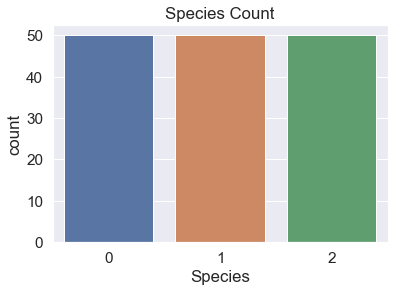

In [62]:
plt.title("Species Count")
sns.countplot(iris["Species"]);

As seen above,dataset is balanced,removing duplicates break the balance of our dataset. 
Checking, if any null value exists in the data set

In [63]:
display(iris.isnull().sum(axis=0))

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Pair-plots for features

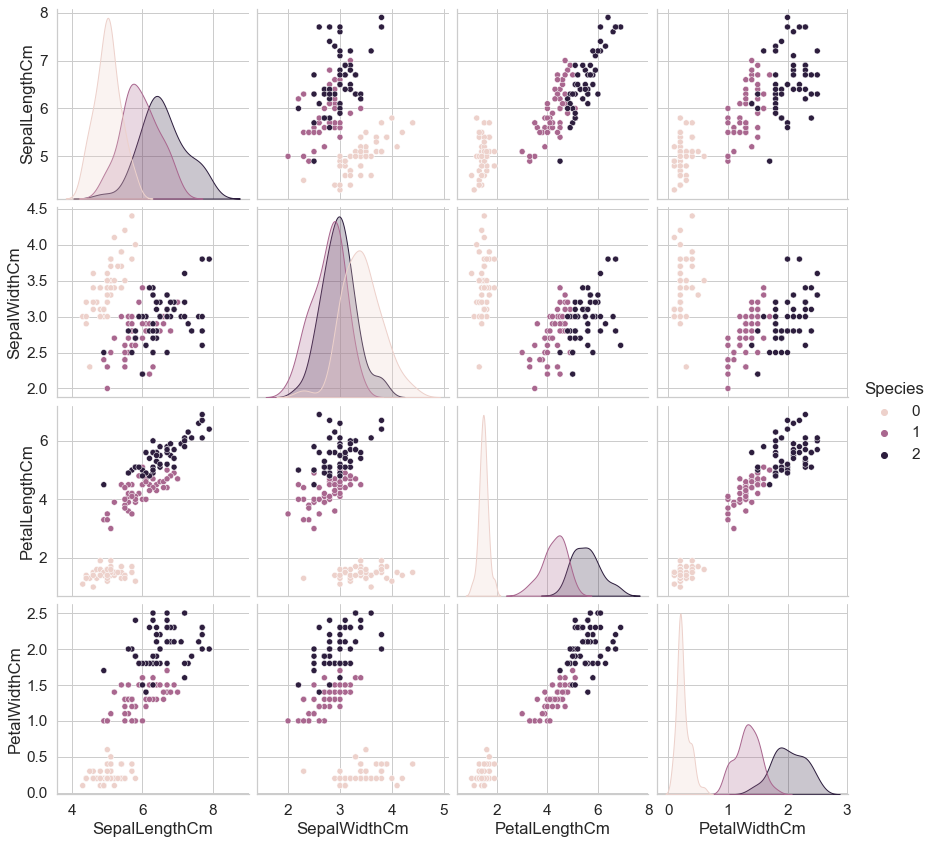

In [64]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="Species",height=3);
plt.show();

When compare species according to their features, 
Setosa appears to have more characteristic features compared to other species and
it cen be observed that the characteristics of Versicolor and Virginia are closer.

### Correlation Matrix of Features - Correlation Matrix of Features and Target

Feature columns: SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Target columns: Species

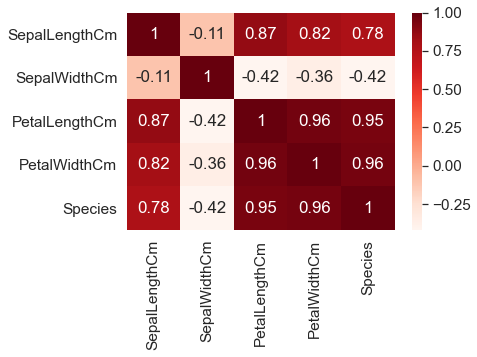

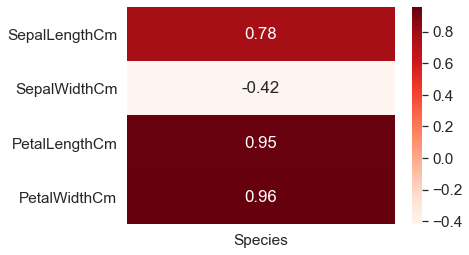

In [65]:
cm =iris.corr()
ft=cm.drop(columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]);    
ft=ft.drop(labels=["Species"]);

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.show()

sns.set(font_scale=1.4)
sns.heatmap(ft, annot=True, cmap=plt.cm.Reds)
plt.show()

As seen above,when we absorve the corrolation between features;
Petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

when we absorve the corrolation of species and feature; it can be expected that;
Virginica sepal_width can be smaller than sepal_width of versicolar and setosa also
petal_length and petal_width of virginaca can be heighest.

# Train the classifier

In [66]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test

In [67]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

### Train The Classifier

In [68]:
clf.fit(X_train_list,y_train_list);

### Predict Class of Test values

In [69]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2]
Prediction
[2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1]
Train Features Expected Classification
[1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1]
Prediction
[1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 

# Results

### Confusion Matrix of Test

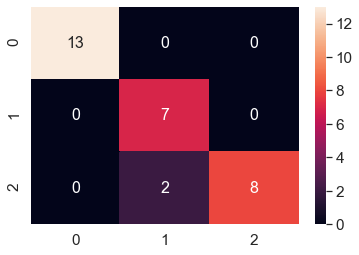

In [70]:
y_pred2 = pd.Series(yhat);
y_test2 = pd.Series(y_test_list);
mt=metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 
plt.show()

13+7+8=28 classification TP: True Positive;

confusion_matrix[3:2] -> TN:True Negative for class0,

confusion_matrix[3:2] -> FP: False Positive for class2


### Confusion Matrix of Train

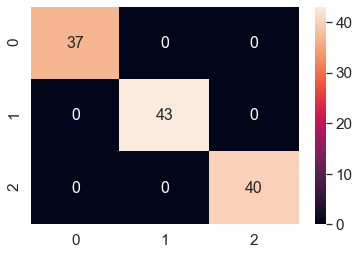

In [71]:
x_pred2 = pd.Series(xhat);
x_test2 = pd.Series(y_train_list);
mt=metrics.confusion_matrix(x_test2, x_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

### F1-Score

In [72]:
f1=metrics.f1_score(y_test2, y_pred2,average='weighted');
print("F1-Score Test:")
print(f1);

f2=metrics.f1_score(x_test2, x_pred2,average='weighted');
print("F1-Score Train:")
print(f2);

F1-Score Test:
0.9337962962962963
F1-Score Train:
1.0


F1= 2/(1/Recall+1/precision); 

checking:2/(1/0.9481481481481481+1/0.9333333333333333)

### Accuracy

In [73]:
accuracy= metrics.accuracy_score(y_test2, y_pred2);
print("Accuracy Test")
print(accuracy);
accuracy2= metrics.accuracy_score(x_test2, x_pred2);
print("Accuracy Train")
print(accuracy2);

Accuracy Test
0.9333333333333333
Accuracy Train
1.0


### Precision

In [74]:
precision=metrics.precision_score(y_test2, y_pred2, average='weighted');
print("Precision Test:")
print(precision);
precision2=metrics.precision_score(x_test2, x_pred2, average='weighted');
print("Precision Train:")
print(precision2);

Precision Test:
0.9481481481481481
Precision Train:
1.0


### Recal

In [75]:
recall=metrics.recall_score(y_test2, y_pred2,average='weighted');
print("Recall Test:")
print(recall);
recall2=metrics.recall_score(x_test2, x_pred2,average='weighted');
print("Recall Train:")
print(recall2);

Recall Test:
0.9333333333333333
Recall Train:
1.0


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

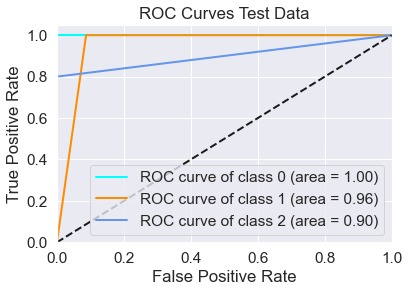

Auc Values of each classes ROC curve are written on graph
Macro Auc value:
0.9521739130434783


In [78]:
y_testb= label_binarize(y_test2, classes=[0, 1, 2]);
y_predb= label_binarize(y_pred2, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_testb[:,i], y_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]));
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]);

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Test Data')
plt.legend(loc="lower right")
plt.show()
print("Auc Values of each classes ROC curve are written on graph")
print("Macro Auc value:")
print(roc_auc["macro"]);
      

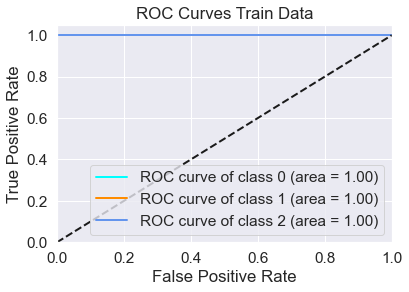

Auc Values of each classes ROC curve are written on graph
Macro Auc value:
1.0


In [79]:
x_testb= label_binarize(x_test2, classes=[0, 1, 2]);
x_predb= label_binarize(x_pred2, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(x_testb[:,i], x_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]));
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]);

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Train Data')
plt.legend(loc="lower right")
plt.show()
print("Auc Values of each classes ROC curve are written on graph")
print("Macro Auc value:")
print(roc_auc["macro"]);

According to the results obtained from the test dataset, minimal deviations were observed while classifying the test data in the created model.

According to the results obtained from the train dataset, overfitting has not been observed.